In [130]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from scipy.stats import pearsonr

In [10]:
sonar_data = pd.read_csv("datasets/sonar.all-data.csv", header=None)

In [11]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [12]:
sonar_data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [13]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [20]:
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

In [21]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [164]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1281)

In [165]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


In [166]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
40   0.0068  0.0232  0.0513  0.0444  0.0249  0.0637  0.0422  0.1130  0.1911   
82   0.0409  0.0421  0.0573  0.0130  0.0183  0.1019  0.1054  0.1070  0.2302   
170  0.0134  0.0172  0.0178  0.0363  0.0444  0.0744  0.0800  0.0456  0.0368   
15   0.0298  0.0615  0.0650  0.0921  0.1615  0.2294  0.2176  0.2033  0.1459   
35   0.0206  0.0132  0.0533  0.0569  0.0647  0.1432  0.1344  0.2041  0.1571   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
158  0.0107  0.0453  0.0289  0.0713  0.1075  0.1019  0.1606  0.2119  0.3061   
152  0.0131  0.0201  0.0045  0.0217  0.0230  0.0481  0.0742  0.0333  0.1369   
189  0.0158  0.0239  0.0150  0.0494  0.0988  0.1425  0.1463  0.1219  0.1697   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
53   0.0293  0.0378  0.0257  0.0062  0.0130  0.0612  0.0895  0.1107  0.0973   

         9   ...      50      51      52      53   

In [167]:
model = LogisticRegression()

In [168]:
model.fit(X_train, Y_train)

LogisticRegression()

In [169]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [170]:
print("Accuracy on training data :", training_data_accuracy)

Accuracy on training data : 0.8128342245989305


In [171]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [172]:
print("Accuracy on test data :", test_data_accuracy)

Accuracy on test data : 1.0


When we change the random state the accuracy score also change. I noticed that when random state gets 100, the accuracy score becomes over 90%(from 76%). Let's try to check highest accuracy from 1 to 50,000 random states. I am just trying to understand how it changes with the random state.

Let's try to graph rando_state with test_ prediction and train prediction to see the corealation between them.

In [132]:
def modelAcuracyScore(state):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=state)
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

    train_score_random_state.append((state, training_data_accuracy))
    test_score_random_state.append((state, test_data_accuracy))

In [134]:
test_score_random_state = []
train_score_random_state = []
model = LogisticRegression()

for i in range(1, 10000):
    modelAcuracyScore(i)
    

In [135]:
print(test_score_random_state)
print(train_score_random_state)

[(1, 0.7619047619047619), (2, 0.9047619047619048), (3, 0.6190476190476191), (4, 0.8095238095238095), (5, 0.6190476190476191), (6, 0.7619047619047619), (7, 0.7619047619047619), (8, 0.6666666666666666), (9, 0.8095238095238095), (10, 0.7619047619047619), (11, 0.9047619047619048), (12, 0.6190476190476191), (13, 0.7142857142857143), (14, 0.7142857142857143), (15, 0.6190476190476191), (16, 0.8095238095238095), (17, 0.7619047619047619), (18, 0.8095238095238095), (19, 0.8571428571428571), (20, 0.8571428571428571), (21, 0.6666666666666666), (22, 0.9047619047619048), (23, 0.9047619047619048), (24, 0.8095238095238095), (25, 0.6666666666666666), (26, 0.7619047619047619), (27, 0.7142857142857143), (28, 0.6666666666666666), (29, 0.9047619047619048), (30, 0.6190476190476191), (31, 0.8095238095238095), (32, 0.6190476190476191), (33, 0.7142857142857143), (34, 0.7619047619047619), (35, 0.7142857142857143), (36, 0.7142857142857143), (37, 0.7142857142857143), (38, 0.8095238095238095), (39, 0.6666666666666

In [136]:
train_score_random_state_df = pd.DataFrame(train_score_random_state, columns=["random_state", "train_accuracy_score"])
test_score_random_state_df = pd.DataFrame(test_score_random_state, columns=["random_state", "test_accuracy_score"])

<Axes: xlabel='random_state', ylabel='train_accuracy_score'>

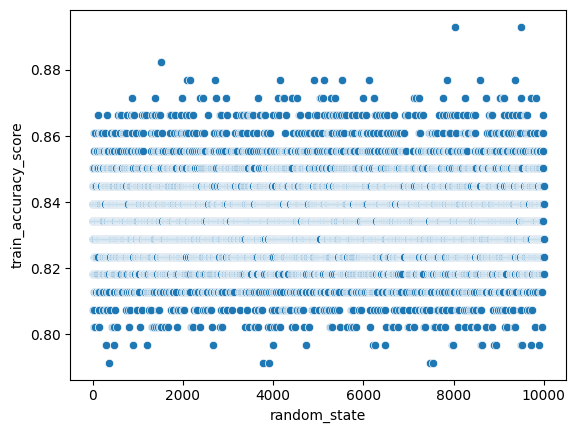

In [137]:
sns.scatterplot(data=train_score_random_state_df, x="random_state", y="train_accuracy_score")

<Axes: xlabel='random_state', ylabel='test_accuracy_score'>

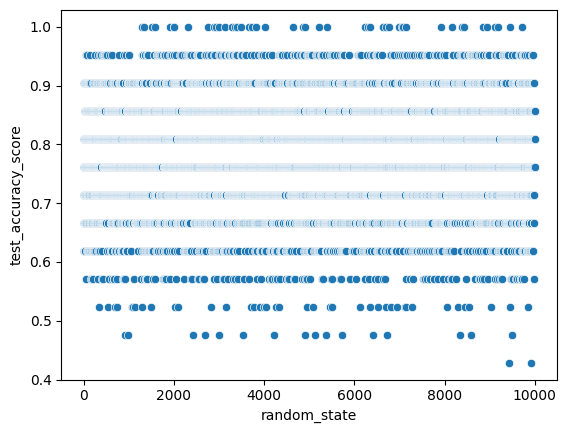

In [138]:
sns.scatterplot(data=test_score_random_state_df, x="random_state", y="test_accuracy_score")


For the first attempt I used only integers between 1 to 99 there visually we cannot see proper relationship between them. Let's try to calculate coefficients of corelation for these.

In [139]:
train_random_state_corr, _ = pearsonr(train_score_random_state_df["random_state"], train_score_random_state_df["train_accuracy_score"])
test_random_state_corr, _ = pearsonr(test_score_random_state_df["random_state"], test_score_random_state_df["test_accuracy_score"])
print(f'Train data - random state correalation: {train_random_state_corr:.3f}')
print(f'Test data - random state correalation: {test_random_state_corr:.3f}')

Train data - random state correalation: 0.007
Test data - random state correalation: 0.009


In [173]:
test_score_random_state_df.loc[test_score_random_state_df["test_accuracy_score"] >0.98].count()
test_score_random_state_df.loc[test_score_random_state_df["test_accuracy_score"] >0.98].set_index("random_state")

,test_accuracy_score
random_state,
1281,1.0
1326,1.0
1511,1.0
1589,1.0
1910,1.0
1993,1.0
1995,1.0
2319,1.0
2749,1.0


Ok. Seems like I got an interesting output here. For the random state 1281 (there are 47 values from 1 to 9999) which het 100% accuracy score. Not sure I have gone throgh the right path. But I just wanted to research how it works.  